In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn import metrics

In [2]:
data = pd.read_csv('./特征聚类1.csv',encoding='gbk')

In [3]:
data.head()

,room,mean,total,median,Upper quantile,Lower quantile,extremum,Standard deviation
0,15_ 202,4.168373,691.95,4.80,1.4750,5.8000,10.65,2.622470
1,15_ 204,4.509940,748.65,3.55,0.5500,6.9000,19.50,4.289790
2,15_ 207,3.946084,655.05,3.80,2.2625,5.3375,12.70,2.695643
3,15_ 211,4.627108,768.10,3.55,3.3625,5.1000,17.55,2.357063
4,15_ 213,1.721446,285.76,1.70,0.0000,2.7250,5.30,1.360124


In [4]:
data_notitle = data.drop('room',axis = 1)

In [6]:
data_scaled = preprocessing.scale(data_notitle)
X = data_scaled
scores = []
for i in range(2,18):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(X)
    scores.append(metrics.silhouette_score(X,km.labels_ ,metric='euclidean'))

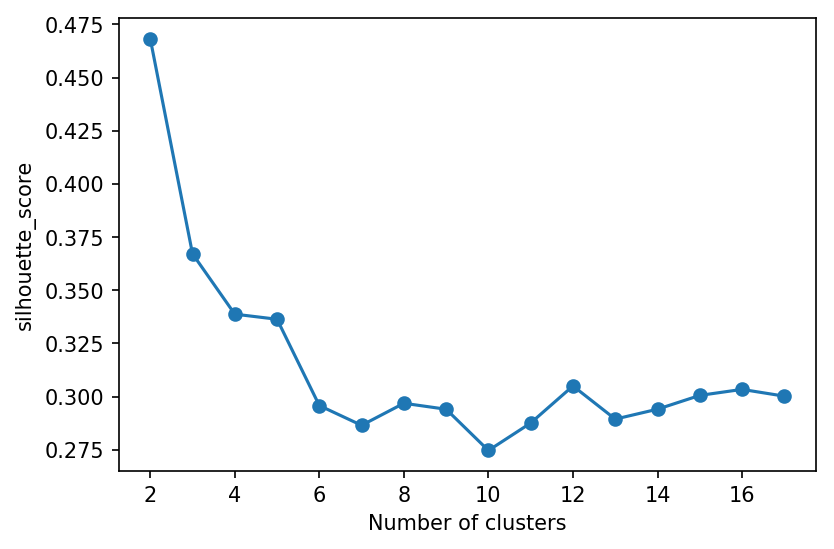

In [8]:
%matplotlib inline
plt.figure(dpi=150)
plt.plot(range(2,18),scores,marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.show
plt.savefig('图4.svg',format='svg')

In [9]:
kmodel = KMeans(n_clusters = 2, n_jobs = 4, max_iter =1000 ) #n_jobs是并行数，一般等于CPU数较好
kmodel.fit(data_scaled) #训练模型
data_scaled = pd.DataFrame(data_scaled,columns = ['mean','total','median','Upper quantile','Lower quantile','extremum','Standard deviation'])

In [10]:
r1 = pd.Series(kmodel.labels_).value_counts()  #统计各个类别的数目
r2 = pd.DataFrame(kmodel.cluster_centers_)     #找出聚类中心
r = pd.concat([r2, r1], axis = 1)
r.columns = list(data_scaled.columns) + [u'类别数目']
r = pd.concat([data_scaled, pd.Series(kmodel.labels_, index = data_scaled.index)], axis = 1)  #详细输出每个样本对应的类别
r.columns = list(data_scaled.columns) + [u'聚类类别']
r.head()

,mean,total,median,Upper quantile,Lower quantile,extremum,Standard deviation,聚类类别
0,-0.734150,-0.734150,-0.183575,-1.094595,-0.669006,-1.244307,-0.750746,1
1,-0.583780,-0.583780,-0.789455,-1.659590,-0.326950,0.032722,0.349533,1
2,-0.832010,-0.832010,-0.668279,-0.613586,-0.812825,-0.948498,-0.702459,1
3,-0.532198,-0.532198,-0.789455,0.058299,-0.886678,-0.248658,-0.925890,1
4,-1.811379,-1.811379,-1.686157,-1.995532,-1.625208,-2.016297,-1.583779,1


In [12]:
julei2 = pd.DataFrame()
julei2['room'] = data['room']
julei2['cluster'] = r['聚类类别']
julei2.to_excel('一阶聚类.xlsx',encoding='gbk')

In [22]:
data_sum = pd.read_excel('./夏季2.xlsx',encoding = 'utf-8')
data_aut = pd.read_excel('./秋季2.xlsx',encoding='utf-8')
data_win = pd.read_excel('./冬季2.xlsx',encoding='utf-8')

In [23]:
new_data = pd.DataFrame(columns=['start'])

new_data['S_M'] = data_sum.mean(axis = 1)
new_data['S_S'] = data_sum.std(axis = 1)

new_data['A_M'] = data_aut.mean(axis = 1)
new_data['A_S'] = data_aut.std(axis = 1)

new_data['W_M'] = data_win.mean(axis = 1)
new_data['W_S'] = data_win.std(axis = 1)

new_data = new_data.drop('start',axis = 1)

In [24]:
data_scaled = preprocessing.scale(new_data)
data_scaled

array([[-7.69192764e-01,  8.57395147e-02, -2.51406727e-02,
         9.21420840e-01,  1.19967944e-01, -7.55432416e-01],
       [-1.19028011e+00, -7.54700737e-01, -1.32988105e+00,
         6.95977019e-01,  1.30502572e+00,  1.10460608e+00],
       [ 1.03204026e+00,  5.39963576e-01, -6.20893902e-01,
         1.15612631e-01, -3.65036958e-01, -2.50472655e-01],
       [ 7.78622241e-01, -5.34339554e-01, -4.78748957e-02,
        -1.27664131e+00,  2.44204935e-01, -2.86952969e-01],
       [-1.36126709e+00, -1.46022329e+00, -1.53361466e+00,
        -1.30172472e+00, -1.91530488e+00, -1.41235610e+00],
       [-1.30001802e+00, -1.32362534e+00, -1.79156066e+00,
        -3.88272538e-01, -1.35958830e+00, -8.13073696e-01],
       [-1.31277825e+00, -1.29770435e+00, -1.84227546e+00,
        -1.34796283e+00, -1.53545720e+00, -4.21651343e-01],
       [-1.90389065e-01, -1.07656521e+00, -1.36278290e-02,
         2.78791935e-01,  3.88322758e-01,  3.58289377e-01],
       [-2.30092989e+00, -2.17758910e+00,  5.876

In [25]:
X = data_scaled
scores = []
for i in range(2,18):
    km = KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(X)
    scores.append(metrics.silhouette_score(X,km.labels_ ,metric='euclidean'))

<function matplotlib.pyplot.show>

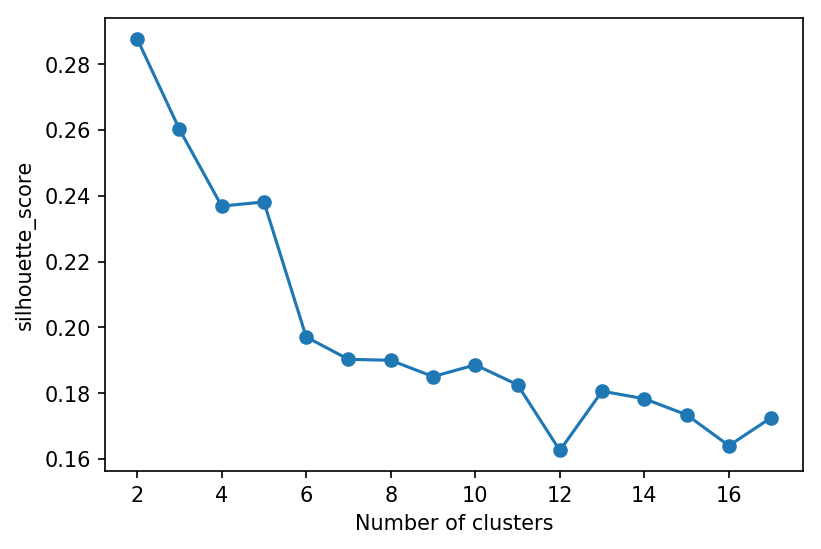

In [26]:
%matplotlib inline
plt.figure(dpi=150)
plt.plot(range(2,18),scores,marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('silhouette_score')
plt.show

In [27]:
kmodel = KMeans(n_clusters = 2, n_jobs = 4, max_iter =1000 ) #n_jobs是并行数，一般等于CPU数较好
kmodel.fit(data_scaled) #训练模型
data_scaled = pd.DataFrame(data_scaled,columns = ['S_M','S_S','A_M','A_S','W_M','W_S'])

In [28]:
r1 = pd.Series(kmodel.labels_).value_counts()  #统计各个类别的数目
r2 = pd.DataFrame(kmodel.cluster_centers_)     #找出聚类中心
r = pd.concat([r2, r1], axis = 1)
r.columns = list(data_scaled.columns) + [u'类别数目']
r = pd.concat([data_scaled, pd.Series(kmodel.labels_, index = data_scaled.index)], axis = 1)  #详细输出每个样本对应的类别
r.columns = list(data_scaled.columns) + [u'聚类类别']
r.head()
r2

,0,1,2,3,4,5
0,-0.624391,-0.540313,-0.821077,-0.698240,-0.916023,-0.834930
1,0.369537,0.319777,0.485944,0.413244,0.542136,0.494142


In [29]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler = scaler.fit(new_data)
scaler.inverse_transform(r2)

array([[2.44459132, 1.76420237, 2.74706034, 1.36659995, 3.4167045 ,
        2.32111987],
       [3.88704837, 2.68029194, 4.24183503, 2.04061304, 5.95128261,
        3.76199753]])

In [30]:
julei = pd.DataFrame()
julei['room'] = data_sum['room']
julei['cluster'] = r['聚类类别']
julei.to_excel('二阶聚类2.xlsx',encoding='gbk')